In [1]:
import numpy as np

a = np.array([1, 2, 3])
b, c, d = a
print(b, c, d)  

1 2 3



Distance between boxes with GJK



/home/shaohang/Installation/anaconda3/envs/iss/lib/python3.8/site-packages/distance3d/utils.py:141: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 1, 'C', False, aligned=True))
  return A2B[:3, 3] + np.dot(A2B[:3, :3], point_in_A)
/home/shaohang/Installation/anaconda3/envs/iss/lib/python3.8/site-packages/distance3d/utils.py:162: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'C', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  return np.dot(points_in_A, A2B[:3, :3].T) + A2B[:3, 3]
/home/shaohang/Installation/anaconda3/envs/iss/lib/python3.8/site-packages/distance3d/utils.py:183: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'A', False, aligned=True))
  return np.dot(directions_in_A, A2B[:3, :3].T)
/home/shaohang/Installation/anaconda3/en

1.440293044348311
4.133342121469611
1.7358449683524244
1.480743975524776
1.5082332994922751
2.183810630237396
1.1376319785191227
2.4660441132297075
3.9789144879566134
2.634515177493687
3.329575385843997
3.2198786233424666
3.3607577264105952
2.296944156095268
2.854112893830668
0.90440752004155
2.1004344960846564
3.196540805385142
3.56545319039108
1.7028264754517612
0.45386907503436663
1.2524143457624317
1.2254270973417332
2.715851303326644
1.3290183493283074
1.3823971177242234
2.0131847654703052
4.634038884957284
2.3925183785403497
2.7324951325127462
3.3066261489385687
0.5665254241548643
2.9219851365747687
2.8126616024176325
1.5866966337136403
1.5207050842290548
1.9291160023672964
1.8851873726363813
1.7741747963064618
1.8688079501713204
1.7145430707121356
1.2695699990803808
1.9243048135837642
2.2567656019463262
3.3390943814145753
3.2105331341201504
3.2389610357199503
0.5583192192072901
1.4042324532282078
2.6909207273283062
2.4281368018440737
1.5301697145606112
3.0101208580670207
5.32221

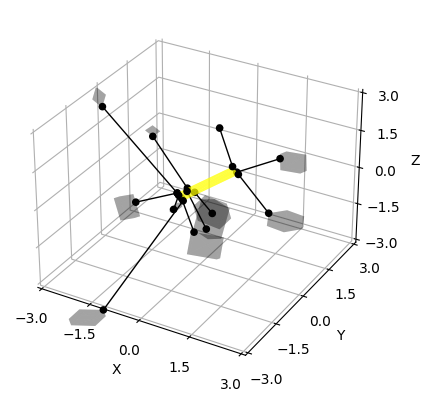

In [1]:
"""
===============================
Distance between boxes with GJK
===============================
"""
print(__doc__)
import time
import numpy as np
import matplotlib.pyplot as plt
import pytransform3d.plot_utils as ppu
from distance3d import gjk, random, geometry, plotting, colliders


random_state = np.random.RandomState(0)
box2origin, size = random.rand_box(random_state, 0.1, 3)
vertices = geometry.convert_box_to_vertices(box2origin, size)
box_collider = colliders.Box(box2origin, size)

ax = ppu.make_3d_axis(ax_s=3)

accumulated_time = 0.0
for i in range(3000):
    box2origin2, size2 = random.rand_box(random_state, 2, 1)
    box_collider2 = colliders.Box(box2origin2, size2)
    start = time.time()
    dist, closest_point_box, closest_point_box2, _ = gjk.gjk(
        box_collider, box_collider2)
    end = time.time()
    accumulated_time += end - start
    print(dist)
    if i > 10:
        continue
    plotting.plot_segment(
        ax, closest_point_box, closest_point_box2, c="k", lw=1)
    ppu.plot_box(ax=ax, A2B=box2origin2, size=size2, wireframe=False, alpha=0.2)
print(f"{accumulated_time=}")

ppu.plot_box(
    ax=ax, A2B=box2origin, size=size, wireframe=False, alpha=0.5,
    color="yellow")
plt.show()